# ОИАД. Лабораторная работа №2

## 1. Импорт библиотек и загрузка данных
Импортируем необходимые библиотеки и загружаем датасет students_simple.csv.

In [1]:
# Импорт библиотек и загрузка данных
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Загрузка датасета
file_path = 'c:/Users/Ullecses/oiad-1-2025/datasets/students_simple.csv'
df = pd.read_csv(file_path)
df.head()

,height,mass,income,iq,pages,age,bmi,work_exp,friends,test_time
0,159,45,430,95,24,20,3.533,26,5,8.5
1,160,61,640,115,32,25,2.623,63,7,6.2
2,161,56,610,111,24,28,2.875,94,10,6.8
3,162,48,330,97,24,19,3.375,16,4,12.0
4,162,54,420,105,60,23,3.000,49,2,7.5


## 2. Выбор признаков по номеру в журнале

Столбцы выбираются по формулам:
- Первый признак: $N \% 5$
- Второй признак: $N^2 \% 5 + 5$

$N = 4$

In [3]:
# Выбор признаков по номеру в журнале
N = 4
col1_idx = N % 5
col2_idx = (N**2) % 5 + 5

columns = df.columns.tolist()
print(f"Доступные столбцы: {columns}")
print(f"Выбранные индексы: {col1_idx}, {col2_idx}")

x = df.iloc[:, col1_idx]
y = df.iloc[:, col2_idx]
print(f"Первый признак: {columns[col1_idx]}")
print(f"Второй признак: {columns[col2_idx]}")

Доступные столбцы: ['height', 'mass', 'income', 'iq', 'pages', 'age', 'bmi', 'work_exp', 'friends', 'test_time']
Выбранные индексы: 4, 6
Первый признак: pages
Второй признак: bmi


## 3. Расчет корреляций

Рассчитаем коэффициенты корреляции Фехнера, Пирсона (и доверительный интервал), Спирмена и Кенделла для выбранных признаков.

In [ ]:
# Корреляция Фехнера
mean_x = np.mean(x)
mean_y = np.mean(y)
sign_x = np.sign(x - mean_x)
sign_y = np.sign(y - mean_y)
coincide = (sign_x == sign_y).sum()
diff = (sign_x != sign_y).sum()
fechner_corr = (coincide - diff) / len(x)
print(f"Коэффициент корреляции Фехнера: {fechner_corr:.4f}")

# Корреляция Пирсона
pearson_corr = np.corrcoef(x, y)[0, 1]
print(f"Коэффициент корреляции Пирсона: {pearson_corr:.4f}")
# Доверительный интервал Пирсона
n = len(x)
from scipy.stats import t
alpha = 0.05
ci_low = pearson_corr - t.ppf(1-alpha/2, n-2) * (1-pearson_corr**2)/np.sqrt(n-2)
ci_high = pearson_corr + t.ppf(1-alpha/2, n-2) * (1-pearson_corr**2)/np.sqrt(n-2)
print(f"Доверительный интервал Пирсона: [{ci_low:.4f}, {ci_high:.4f}]")

# Корреляция Спирмена
spearman_corr = stats.spearmanr(x, y)[0]
print(f"Коэффициент корреляции Спирмена: {spearman_corr:.4f}")

# Корреляция Кенделла
kendall_corr = stats.kendalltau(x, y)[0]
print(f"Коэффициент корреляции Кенделла: {kendall_corr:.4f}")

Коэффициент корреляции Фехнера: -0.4000
Коэффициент корреляции Пирсона: -0.1795
Доверительный интервал Пирсона: [-0.6587, 0.2997]
Коэффициент корреляции Спирмена: -0.3239
Коэффициент корреляции Кенделла: -0.2442


По результатам анализа можно сделать вывод, что между исследуемыми признаками наблюдается слабая отрицательная зависимость — при увеличении одного признака значения второго имеют тенденцию к уменьшению. Однако все полученные коэффициенты корреляции (Фехнера, Пирсона, Спирмена и Кенделла) имеют невысокие значения, , что указывает на отсутствие статистически значимой связи между признаками. Доверительный интервал Пирсона также включает ноль, что подтверждает, что обнаруженная зависимость может быть случайной. Таким образом, можно заключить, что между исследуемыми переменными нет достоверной корреляции.

## 4. Визуализация данных

Построим гистограммы для каждого признака и scatter plot для выбранной пары.

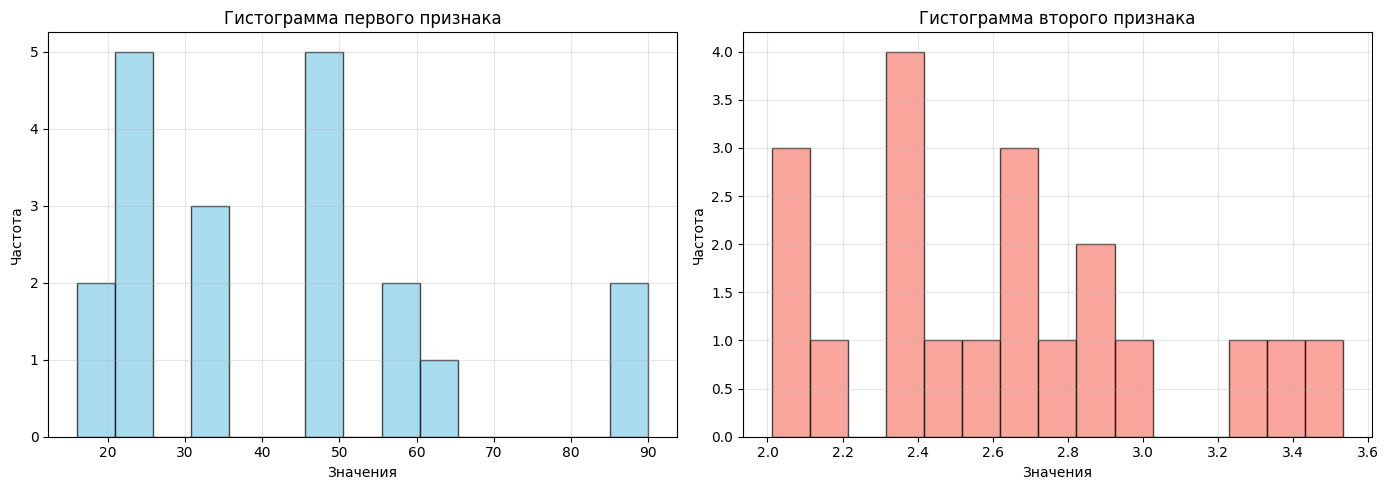

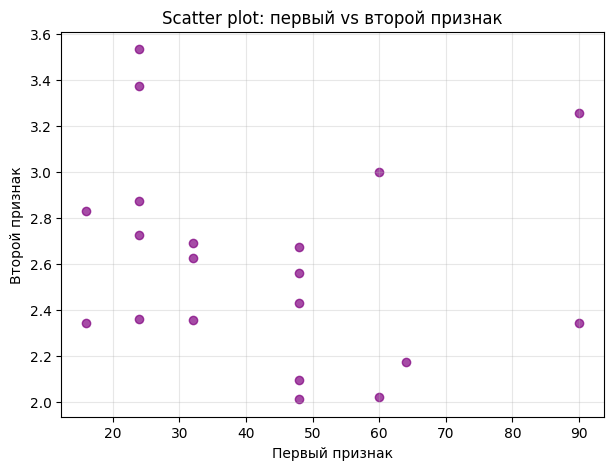

In [9]:
# Визуализация данных
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.hist(x, bins=15, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Гистограмма первого признака')
plt.xlabel('Значения')
plt.ylabel('Частота')
plt.grid(alpha=0.3)

plt.subplot(1, 2, 2)
plt.hist(y, bins=15, color='salmon', edgecolor='black', alpha=0.7)
plt.title('Гистограмма второго признака')
plt.xlabel('Значения')
plt.ylabel('Частота')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

plt.figure(figsize=(7, 5))
plt.scatter(x, y, alpha=0.7, color='purple')
plt.title('Scatter plot: первый vs второй признак')
plt.xlabel('Первый признак')
plt.ylabel('Второй признак')
plt.grid(alpha=0.3)
plt.show()

## 5. Построение уравнений регрессии

Построим уравнения регрессии: линейную, квадратичную, гиперболическую, показательную. Визуализируем результаты на графиках.

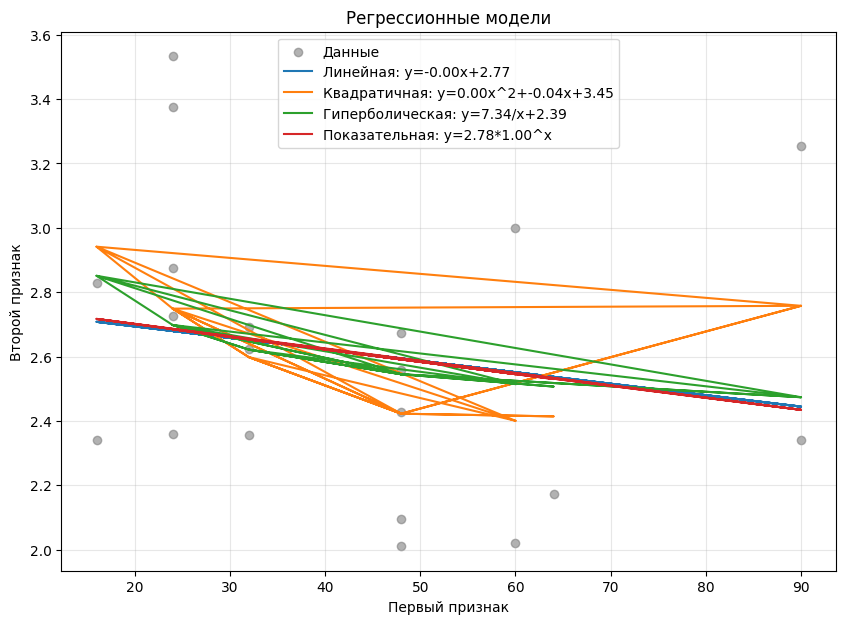

In [10]:
# Построение уравнений регрессии
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from scipy.optimize import curve_fit

X = x.values.reshape(-1, 1)
Y = y.values

# Линейная регрессия
def linear_func(x, w1, w0):
    return w1 * x + w0
lin_reg = LinearRegression()
lin_reg.fit(X, Y)
w1_lin = lin_reg.coef_[0]
w0_lin = lin_reg.intercept_
Y_pred_lin = lin_reg.predict(X)

# Квадратичная регрессия
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
quad_reg = LinearRegression()
quad_reg.fit(X_poly, Y)
w2_quad = quad_reg.coef_[2]
w1_quad = quad_reg.coef_[1]
w0_quad = quad_reg.intercept_
Y_pred_quad = quad_reg.predict(X_poly)

# Гиперболическая регрессия
def hyperbolic_func(x, w1, w0):
    return w1 / x + w0
params_hyper, _ = curve_fit(hyperbolic_func, x, y)
Y_pred_hyper = hyperbolic_func(x, *params_hyper)

# Показательная регрессия
def exponential_func(x, w1, w0):
    return w0 * (w1 ** x)
params_exp, _ = curve_fit(exponential_func, x, y, maxfev=10000)
Y_pred_exp = exponential_func(x, *params_exp)

# Визуализация
plt.figure(figsize=(10, 7))
plt.scatter(x, y, label='Данные', color='gray', alpha=0.6)
plt.plot(x, Y_pred_lin, label=f'Линейная: y={w1_lin:.2f}x+{w0_lin:.2f}')
plt.plot(x, Y_pred_quad, label=f'Квадратичная: y={w2_quad:.2f}x^2+{w1_quad:.2f}x+{w0_quad:.2f}')
plt.plot(x, Y_pred_hyper, label=f'Гиперболическая: y={params_hyper[0]:.2f}/x+{params_hyper[1]:.2f}')
plt.plot(x, Y_pred_exp, label=f'Показательная: y={params_exp[1]:.2f}*{params_exp[0]:.2f}^x')
plt.legend()
plt.title('Регрессионные модели')
plt.xlabel('Первый признак')
plt.ylabel('Второй признак')
plt.grid(alpha=0.3)
plt.show()

По полученным данным видно, что между первым и вторым признаком нет выраженной зависимости: точки на графике расположены хаотично, а линии всех моделей почти горизонтальны. Это означает, что изменение одного признака практически не влияет на другой, то есть признаки статистически независимы.

## 6. Проверка уравнения регрессии (критерий Фишера)

Для наилучшей и наихудшей модели рассчитаем критерий Фишера и проверим соответствие модели данным.

R² = 1 → модель идеально описывает данные,

R² = 0 → модель бесполезна,

R² < 0 → модель даже хуже, чем просто среднее значение.

In [ ]:
# Проверка моделей по критерию Фишера
from sklearn.metrics import r2_score

def fisher_criterion(y_true, y_pred, k):
    n = len(y_true)
    # Показывает, какая доля изменчивости данных объясняется моделью
    r2 = r2_score(y_true, y_pred)
    F = (r2 / (1 - r2)) * ((n - k) / (k - 1))
    return F, r2

models = {
    'Линейная': (Y_pred_lin, 2),
    'Квадратичная': (Y_pred_quad, 3),
    'Гиперболическая': (Y_pred_hyper, 2),
    'Показательная': (Y_pred_exp, 2)
}
results = {}
for name, (y_pred, k) in models.items():
    F, r2 = fisher_criterion(Y, y_pred, k)
    results[name] = (F, r2)
    print(f"{name}: F = {F:.2f}, R^2 = {r2:.4f}")

best = max(results.items(), key=lambda x: x[1][1])
worst = min(results.items(), key=lambda x: x[1][1])
print(f"\nЛучшая модель: {best[0]} (R^2 = {best[1][1]:.4f})")
print(f"Худшая модель: {worst[0]} (R^2 = {worst[1][1]:.4f})")

Линейная: F = 0.60, R^2 = 0.0322
Квадратичная: F = 1.90, R^2 = 0.1830
Гиперболическая: F = 1.29, R^2 = 0.0670
Показательная: F = 0.65, R^2 = 0.0346

Лучшая модель: Квадратичная (R^2 = 0.1830)
Худшая модель: Линейная (R^2 = 0.0322)


По результатам проверки моделей видно, что ни одна из регрессионных моделей не объясняет данные хорошо: значения R² низкие для всех вариантов. Лучшая модель — квадратичная, но её R² = 0.1830 всё равно указывает на слабую связь между признаками. Линейная модель оказалась самой слабой (R² = 0.0322), практически не отражая зависимости. Значения критерия Фишера также невысокие, что подтверждает отсутствие статистически значимой регрессионной связи между признаками.